# Visualisation avancée avec SEABORN

SEABORN propose un certain nombre de fonction permettant de représenter les données.<br>
Les fonction intéréssantes sont les suivantes :
- factorplot
- FacetGrid
- pairplot
- PairGrid
- jointplot
- JointGrid

In [18]:
from sklearn import datasets
import pandas as p
import numpy as n
import matplotlib.pyplot as plt
import seaborn as sns

## Importation du jeu de donnée IRIS

In [19]:
iris_data = datasets.load_iris().data
iris_tar = datasets.load_iris().target
df = p.DataFrame(iris_data)
df.columns = ["x0","x1","x2","x3"]
df["res"]= iris_tar

## FactorPlot
Cette première fonction permet de facilement représenter deux voir 3 variables ensembles.
On peut directement utiliser les DATAframes et les noms des colonnes.

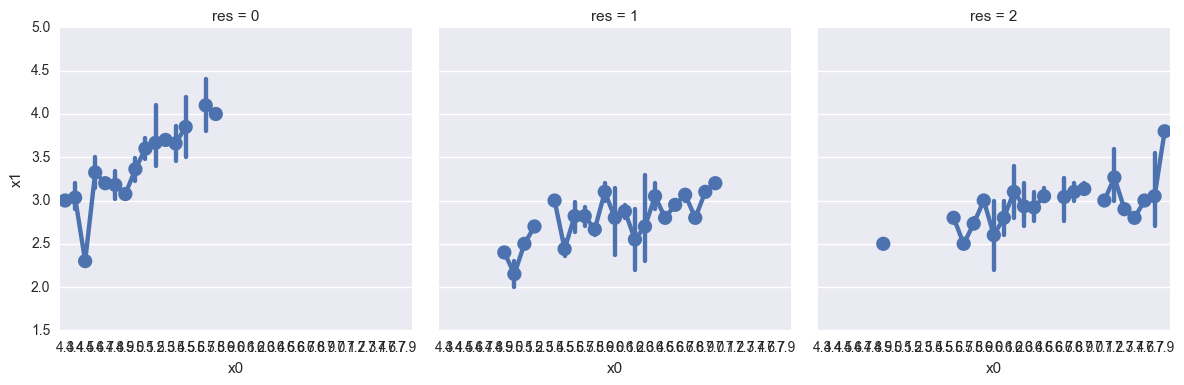

In [9]:
sns.factorplot(data=df,x="x0",y="x1",col="res")
plt.show()

## FacetGrid
Nous pouvons réaliser le même type de graphique en utilisant facetGrid

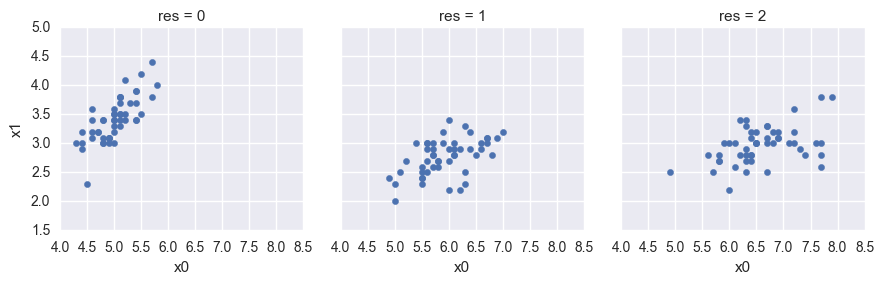

In [10]:
g = sns.FacetGrid(data=df,col="res")
g.map(plt.scatter,"x0","x1")
plt.show()

On peut aussi représenter l'ensemble sur le même graphique en utilisant un gradient de couleur.

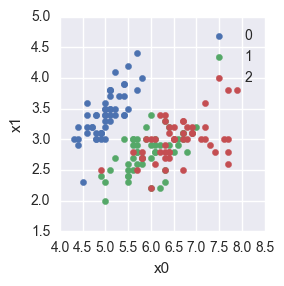

In [13]:
g = sns.FacetGrid(data=df,hue="res")
g.map(plt.scatter,"x0","x1")
plt.legend()
plt.show()

Si on souhaite afficher contours.

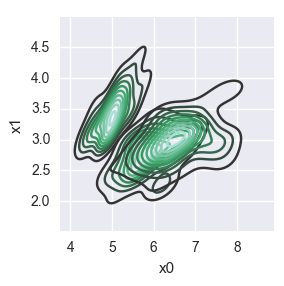

In [15]:
g = sns.FacetGrid(data=df,hue="res")
g.map(sns.kdeplot,"x0","x1")
plt.show()

## Pairplot
Il est possible de représenter toutes les données.

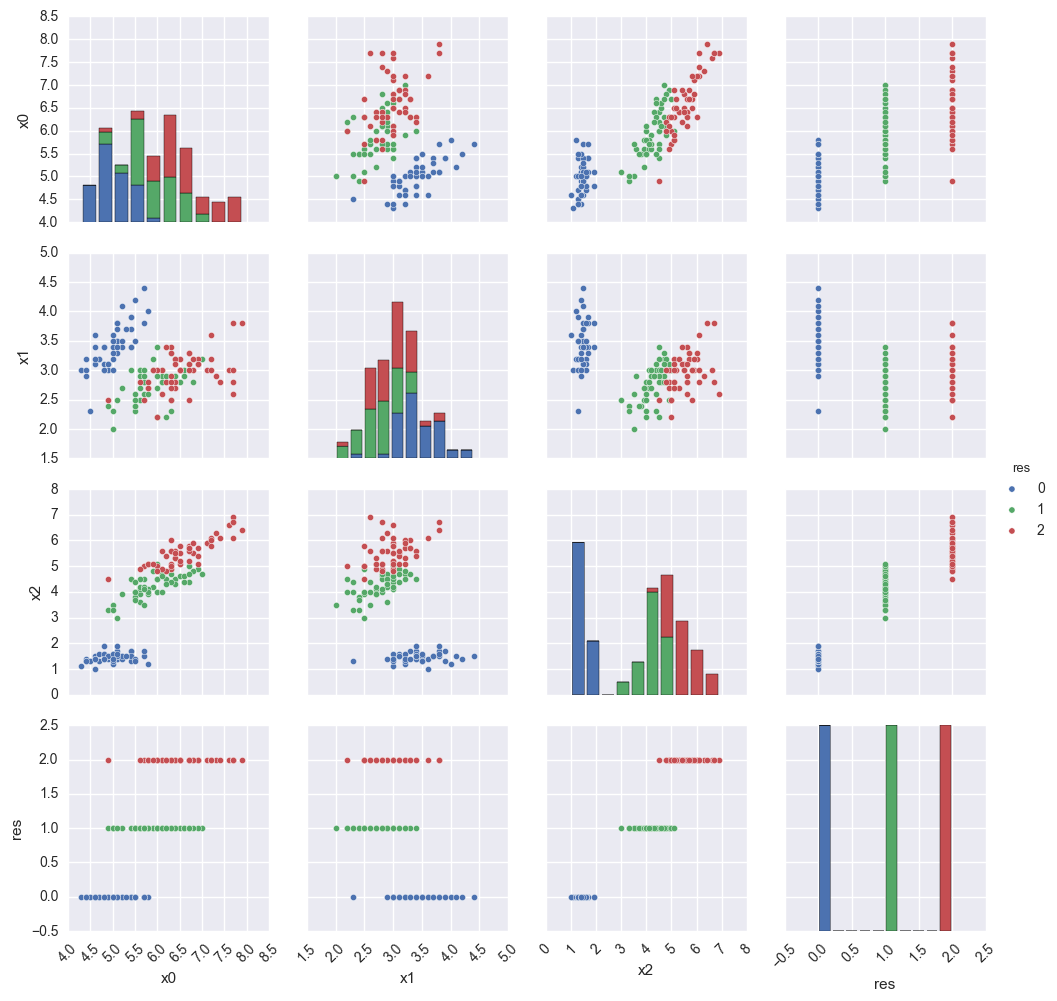

In [16]:
g = sns.pairplot(df[["x0","x1","x2","res"]], hue="res")
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

## PairGrid
PairGrid permet de complessifier Pairplot.
Il est possible de customiser chaque graphe.

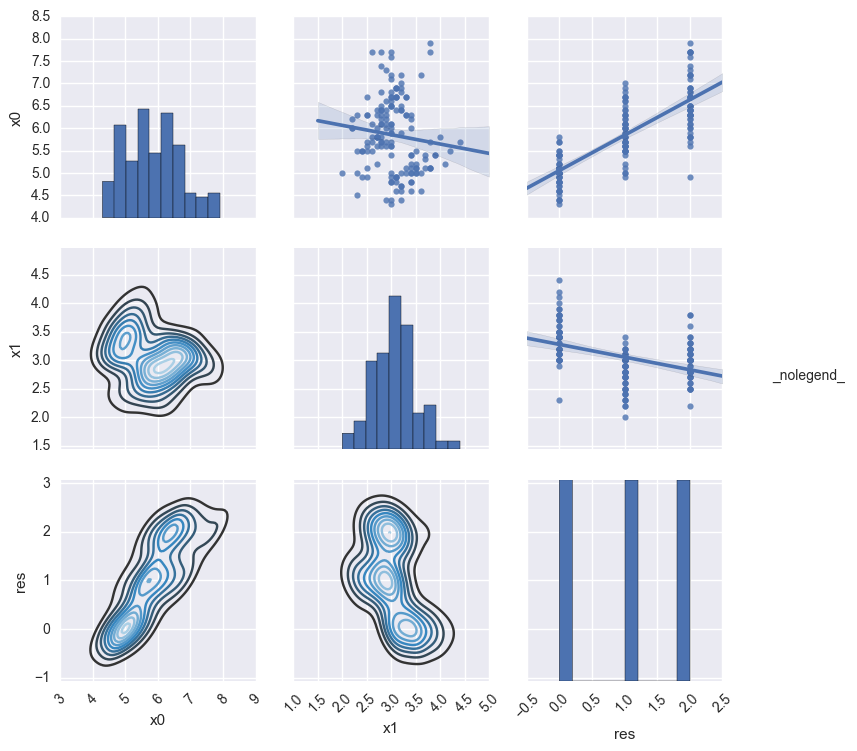

In [22]:
g = sns.PairGrid(df[["x0","x1","res"]])
g.map_upper(sns.regplot)  
g.map_lower(sns.kdeplot,cmap="Blues_d")  
g.map_diag(plt.hist)  
for ax in g.axes.flat:  
    plt.setp(ax.get_xticklabels(), rotation=45)
g.add_legend()  
plt.show()

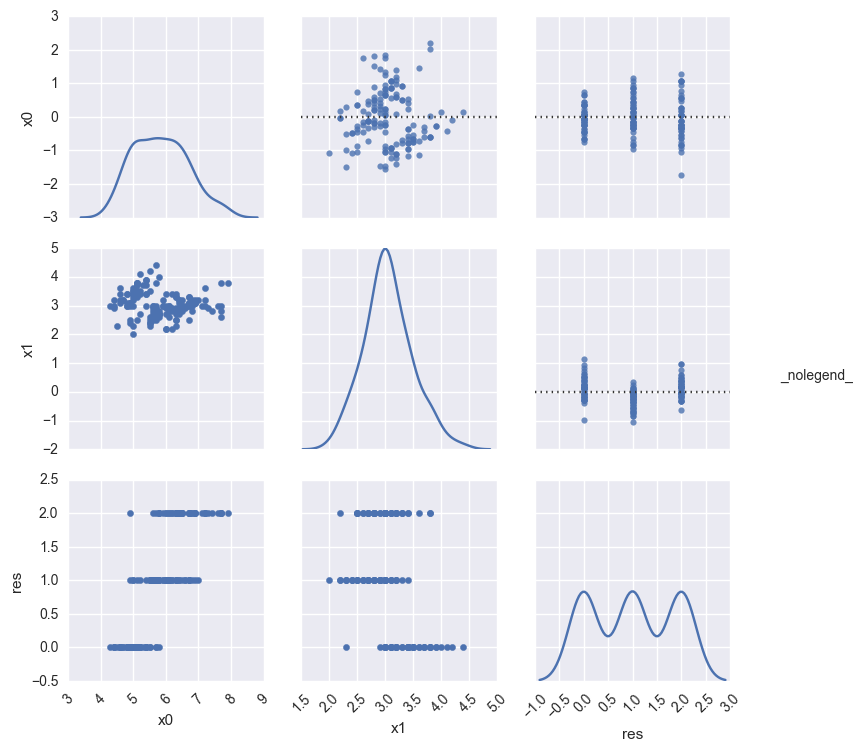

In [26]:
g = sns.PairGrid(df[["x0","x1","res"]])
g.map_upper(sns.residplot)  
g.map_lower(plt.scatter)  
g.map_diag(sns.kdeplot,legend=False)  
for ax in g.axes.flat:  
    plt.setp(ax.get_xticklabels(), rotation=45)
g.add_legend()  
plt.show()

## Jointplot
Jointplot permet de représenter une variable en fonction d'une autre avec leurs répartitions.

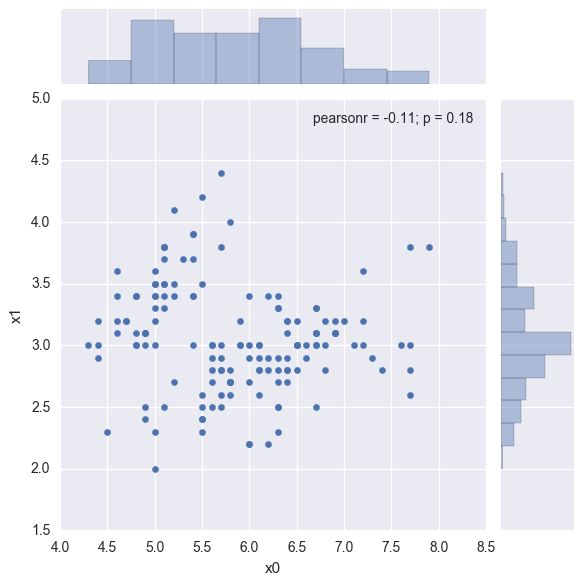

In [27]:
sns.jointplot("x0","x1",data = df)
plt.show()

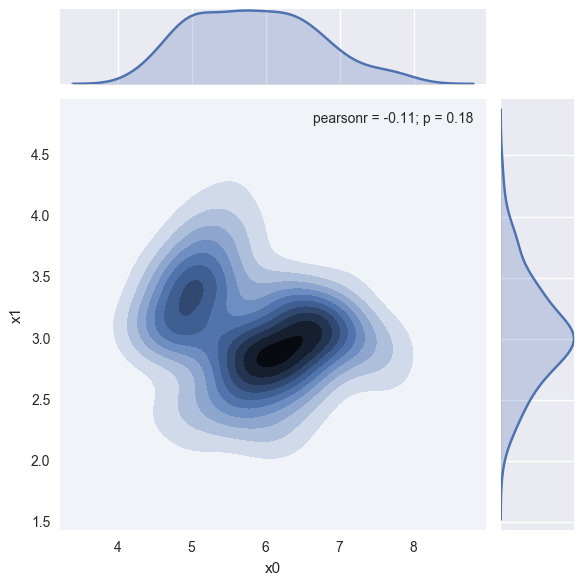

In [28]:
sns.jointplot("x0","x1",data = df,kind="kde")
plt.show()

## JointGrid
JointGrid donne un peu plus de control des différents graphiques

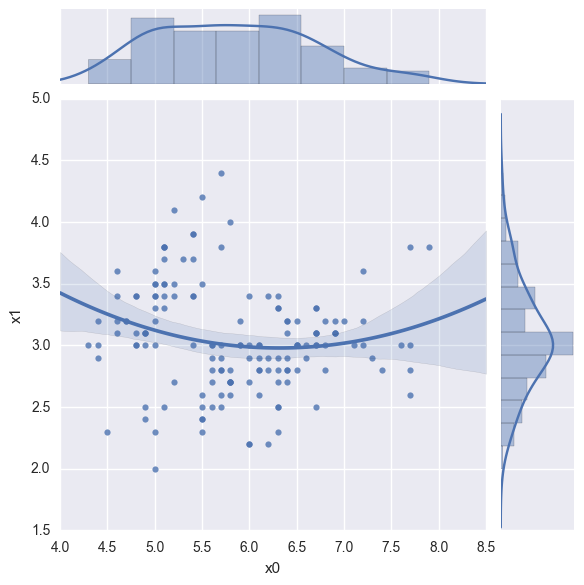

In [29]:
g=sns.JointGrid("x0","x1",data=df)
g.plot_joint(sns.regplot, order=2)  
g.plot_marginals(sns.distplot)
plt.show()